In [4]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [5]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [6]:
y.shape, tx.shape

((10000,), (10000, 2))

In [20]:
w = np.array([1,2])
y.shape[0]
np.dot(tx,w)

array([ 4.88812299,  2.25507336,  5.02488691, ..., -0.29937583,
        2.38624937, -1.29941662])

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [38]:
def compute_error_vector(y,tx,w):
    return y -np.dot(tx,w)


def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    e = y - np.dot(tx,w)
    return (1/2)*np.mean(e**2)

compute_loss(y,tx,w)

2694.4833658870843

# 2 Grid Search

Fill in the function `grid_search()` below:

In [28]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i in range(len(w0)):
        for j in range(len(w1)):
            losses[i,j] = compute_loss(y,tx,np.array([w0[i],w1[j]]))
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=15.428548387428222, w0*=73.57859531772576, w1*=13.545150501672254, execution time=3.715 seconds


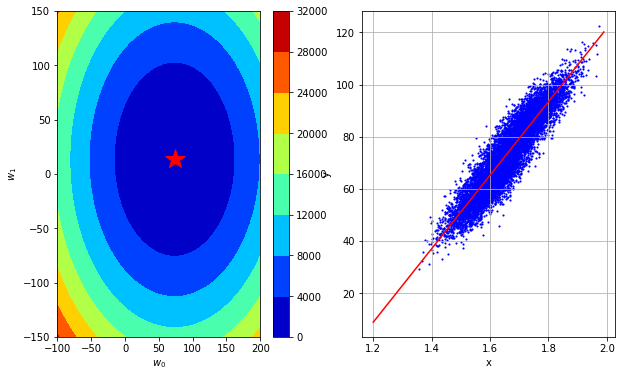

In [53]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=300)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [44]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    e = compute_error_vector(y,tx,w)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    return (-1/len(y))*tx.T.dot(e)
w = np.array([100,20])
w1 = np.array([50,10])
print(compute_gradient(y,tx,w))
print(compute_gradient(y,tx,w1))

[26.706078    6.52028757]
[-23.293922    -3.47971243]


Please fill in the functions `gradient_descent` below:

In [50]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y,tx,w)
        gradient = compute_gradient(y,tx,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w -gamma*gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [66]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591674, w0=7.3293922002105205, w1=1.347971243498896
Gradient Descent(1/49): loss=2264.635056030003, w0=13.925845180399996, w1=2.5611453626479035
Gradient Descent(2/49): loss=1837.2777140793794, w0=19.862652862570513, w1=3.6530020698820147
Gradient Descent(3/49): loss=1491.118267099375, w0=25.205779776523983, w1=4.63567310639271
Gradient Descent(4/49): loss=1210.7291150455712, w0=30.0145939990821, w1=5.520077039252343
Gradient Descent(5/49): loss=983.6139018819906, w0=34.3425267993844, w1=6.316040578826006
Gradient Descent(6/49): loss=799.6505792194903, w0=38.23766631965648, w1=7.032407764442303
Gradient Descent(7/49): loss=650.6402878628647, w0=41.74329188790136, w1=7.677138231496975
Gradient Descent(8/49): loss=529.9419518639979, w0=44.89835489932174, w1=8.25739565184618
Gradient Descent(9/49): loss=432.17629970491595, w0=47.737911609600076, w1=8.779627330160466
Gradient Descent(10/49): loss=352.9861214560597, w0=50.29351264885059, w1=9.2496358

In [67]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [70]:
for minibatchy, minibatchx in batch_iter(y,tx,2):
    print(minibatchy)
    print(minibatchx)

[60.18005771 56.63300008]
[[ 1.         -1.07935388]
 [ 1.         -1.51914158]]


In [89]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    e = compute_error_vector(y,tx,w)
    return - tx.T.dot(e)/len(e)

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    w = initial_w
    ws = [initial_w]
    losses = []
    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y,tx,batch_size=batch_size,num_batches=1):
            grad = compute_stoch_gradient(y_batch,tx_batch,w)
            w = w - gamma * grad
            loss = compute_loss(y,tx,w)
            ws.append(w)
            losses.append(loss)
        print("SGD({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [91]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 4

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD(0/49): loss=212.64370480694376, w0=53.48781150398656, w1=14.97424273329141
SGD(1/49): loss=148.09124672425074, w0=68.25565502194874, w1=-2.013078906389948
SGD(2/49): loss=29.1462283681293, w0=68.291028629777, w1=15.058236715358058
SGD(3/49): loss=26.113542414832853, w0=68.9695699891483, w1=15.139618685366631
SGD(4/49): loss=22.692582890695547, w0=75.12199147496634, w1=10.122399216636396
SGD(5/49): loss=15.494624202470801, w0=73.36685774794515, w1=13.019111692195928
SGD(6/49): loss=15.444217988022876, w0=72.9524000781649, w1=13.47491515919148
SGD(7/49): loss=22.877800596722693, w0=70.24207952238393, w1=11.098518840432863
SGD(8/49): loss=27.851722427707266, w0=73.06190640027513, w1=8.491943607320392
SGD(9/49): loss=15.815100997525603, w0=73.35287192261363, w1=12.555076742262205
SGD(10/49): loss=16.237503217378205, w0=73.80963825615034, w1=14.67857332867574
SGD(11/49): loss=16.72762356856857, w0=73.95628899828178, w1=14.977958530213176
SGD(12/49): loss=15.657024089734696, w0=72.597678

In [92]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)